#🌸 Forouzan Fallah 🌸

Github: Forouzanfallah

Personal Website: [forouzanfallah.ir](https://forouzanfallah.ir)

Don't hesitate to contact me for any further questions ☺

# K-Means Clustering

## Importing the libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

It's clustering! so there is no need to split the data set into training and test set:)

we use y_test just for confusion matrix.

In [44]:
dataset = pd.read_csv('Train_Data.csv')
X = dataset.iloc[:,:].values
dataset = pd.read_csv('Train_Labels.csv')
y_test = dataset.iloc[:,:].values

Determining the optimal number of clusters in a data set is a fundamental issue in partitioning clustering, such as k-means clustering, which requires the user to specify the number of clusters k to be generated.

Unfortunately, there is no definitive answer to this question. The optimal number of clusters is somehow subjective and depends on the method used for measuring similarities and the parameters used for partitioning.

## Using the elbow method to find the optimal number of clusters

The Elbow method looks at the total WSS as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS.





First, you can choose a pretty wide range and when you identify the approximate range, you can choose a narrow range to determine the number better.

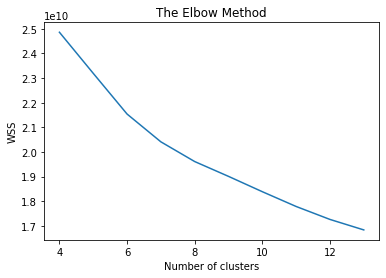

In [45]:
from sklearn.cluster import KMeans
wss = []
for i in range(4, 14):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wss.append(kmeans.inertia_)
plt.plot(range(4, 14), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

it seems that 10 is the reasonable number to be chosen for the number of clusters.

## Training the K-Means model on the dataset

In [46]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [47]:
print(y_kmeans)

[1 1 3 ... 7 3 7]


## Visualising the clusters

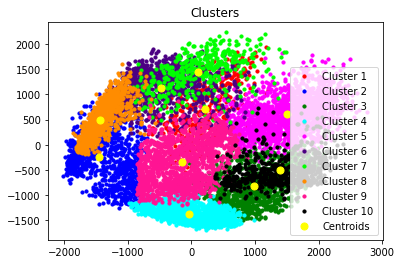

In [51]:
#all points--> different clusters in different colors
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 10, c = 'indigo', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 10, c = 'lime', label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 10, c = 'darkorange', label = 'Cluster 8')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 10, c = 'deeppink', label = 'Cluster 9')
plt.scatter(X[y_kmeans == 9, 0], X[y_kmeans == 9, 1], s = 10, c = 'black', label = 'Cluster 10')

#centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')


plt.title('Clusters')
plt.legend()
plt.show()

#Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_kmeans)
print(cm)

[[  6  70 112   7  20   0   4   0 289 489]
 [  0  18  69 926  13   0   0   0  23   0]
 [  7  72  33   0 611   0   1   0 290  10]
 [  0  56 416 369  12   0   0   0 131  10]
 [  9  34 151   9 608   0   5   0 159   0]
 [  3 668   0   0   1  79   2 230  10   0]
 [  5 100  75   4 292   0  11   0 346 113]
 [  0 115   0   0   0  39   0 854   0   0]
 [396  56   9   1  50   0 387  43  59   1]
 [  0  36   1   0   2 835   0 122  15   0]]


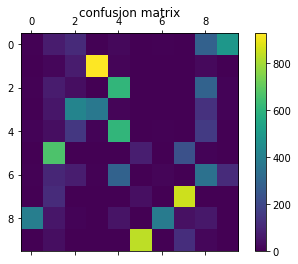

In [53]:
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(cm)
fig.colorbar(cax)
plt.title('confusion matrix')
plt.show()

well, i tried th 6 cluster and i think it is a better clustering. maybe it is because of the limit number of data we have.

In [61]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

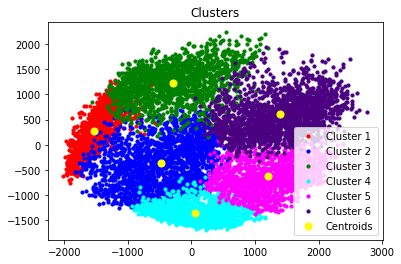

In [62]:
#all points--> different clusters in different colors
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 10, c = 'indigo', label = 'Cluster 6')

#centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')


plt.title('Clusters')
plt.legend()
plt.show()